# Лабораторная работа №6

### Используемые библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans, DBSCAN, OPTICS, cluster_optics_dbscan
from sklearn.decomposition import PCA
from matplotlib import gridspec

### Исходные данные:
[`ccdata`](https://www.kaggle.com/arjunbhasin2013/ccdata)

## Загрузка данных

In [4]:
data = pd.read_csv('CC GENERAL.csv').iloc[:,1:].dropna()
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data)

KMeans(n_clusters=3, n_init=15)

In [6]:
data = np.array(data, dtype='float')
min_max_scaler = pp.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)
scaled_data

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

In [205]:
clustering = DBSCAN().fit(scaled_data)
print(set(clustering.labels_))
print(len(set(clustering.labels_)) - 1)
print(list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
36
0.7512737378415933


/tmp/ipykernel_129159/3713984644.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


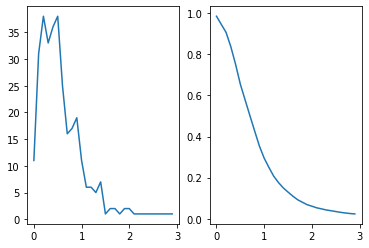

In [206]:
unclust = []
dist = 0
clusters = []
while dist < 3:
    dist += 0.1
    clustering = DBSCAN(eps=dist).fit(scaled_data)
    unclust += [list(clustering.labels_).count(-1) / len(list(clustering.labels_))]
    clusters += [len(set(clustering.labels_)) - 1]

ys = [index / 10 for index, value in enumerate(clusters)]
figure, axes = plt.subplots(1, 2)
axes[0].plot(ys, clusters)
axes[1].plot(ys, unclust)
figure.show()

/tmp/ipykernel_129159/2029131634.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


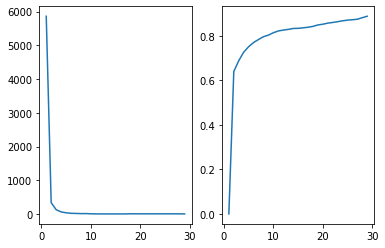

In [207]:
unclust = []
clusters = []
for samples in range(29):
    clustering = DBSCAN(min_samples=samples+1).fit(scaled_data)
    unclust += [list(clustering.labels_).count(-1) / len(list(clustering.labels_))]
    clusters += [len(set(clustering.labels_)) - 1]

ys = [index+1 for index, value in enumerate(clusters)]
figure, axes = plt.subplots(1, 2)
axes[0].plot(ys, clusters)
axes[1].plot(ys, unclust)
figure.show()

In [208]:
clustering = DBSCAN(eps=5.6, min_samples=2).fit(scaled_data)
print(f"Unclustered percent: {list(clustering.labels_).count(-1) / len(list(clustering.labels_))}")
print(f"Clusters number: {len(set(clustering.labels_)) - 1}")

Unclustered percent: 0.002779064381658175
Clusters number: 6


Estimated number of clusters: 6
Estimated number of noise points: 24


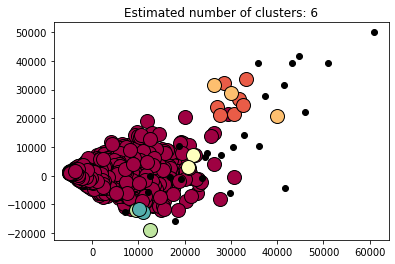

In [209]:
db = DBSCAN(eps=5.6, min_samples=2).fit(scaled_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = reduced_data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = reduced_data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

/tmp/ipykernel_129159/1355069688.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


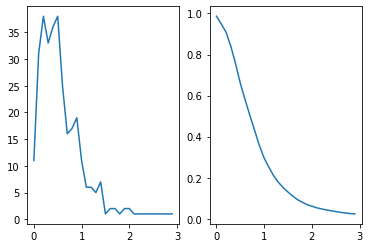

In [210]:
unclust = []
dist = 0
clusters = []
while dist < 3:
    dist += 0.1
    clustering = OPTICS(cluster_method='dbscan', max_eps=dist).fit(scaled_data)
    unclust += [list(clustering.labels_).count(-1) / len(list(clustering.labels_))]
    clusters += [len(set(clustering.labels_)) - 1]

ys = [index / 10 for index, value in enumerate(clusters)]
figure, axes = plt.subplots(1, 2)
axes[0].plot(ys, clusters)
axes[1].plot(ys, unclust)
figure.show()

/tmp/ipykernel_129159/1433540324.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


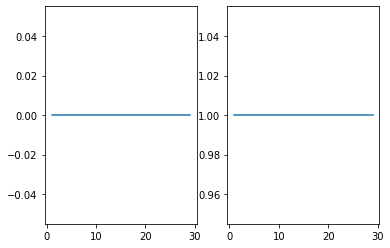

In [214]:
unclust = []
clusters = []
for samples in range(29):
    clustering = OPTICS(cluster_method='dbscan', min_samples=1/(samples+1)).fit(scaled_data)
    unclust += [list(clustering.labels_).count(-1) / len(list(clustering.labels_))]
    clusters += [len(set(clustering.labels_)) - 1]

ys = [index+1 for index, value in enumerate(clusters)]
figure, axes = plt.subplots(1, 2)
axes[0].plot(ys, clusters)
axes[1].plot(ys, unclust)
figure.show()

In [212]:
clustering = OPTICS(cluster_method='dbscan', max_eps=2, min_samples=3).fit(scaled_data)
print(f"Unclustered percent: {list(clustering.labels_).count(-1) / len(list(clustering.labels_))}")
print(f"Clusters number: {len(set(clustering.labels_)) - 1}")

Unclustered percent: 0.06310792033348772
Clusters number: 6


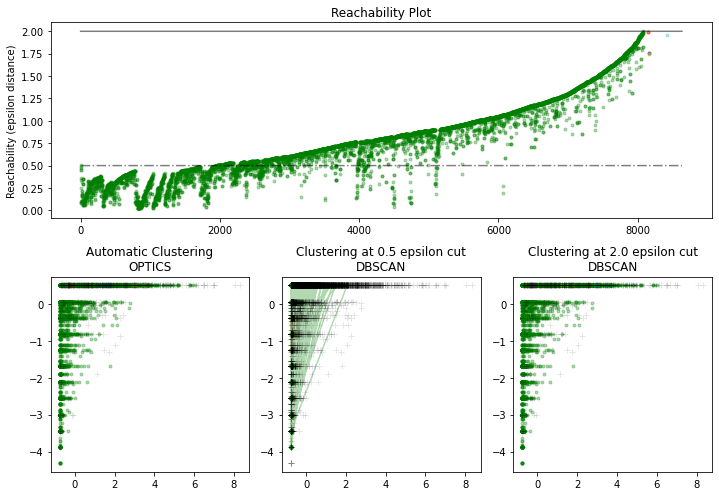

In [213]:
clust = OPTICS(cluster_method='dbscan', max_eps=2, min_samples=3)

# Run the fit
clust.fit(scaled_data)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(scaled_data))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = scaled_data[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(scaled_data[clust.labels_ == -1, 0], scaled_data[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g", "greenyellow", "olive", "r", "b", "c"]
for klass, color in zip(range(0, 6), colors):
    Xk = scaled_data[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker=".")
ax3.plot(scaled_data[labels_050 == -1, 0], scaled_data[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = scaled_data[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(scaled_data[labels_200 == -1, 0], scaled_data[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

In [10]:
for metrics in ('canberra', 'chebyshev', 'manhattan', 'euclidean', 'sqeuclidean'):
    clustering = OPTICS(metric=metrics).fit(scaled_data)
    print(f"{metrics}: clusters number - {len(set(clustering.labels_)) - 1}, unclustered number -  {list(clustering.labels_).count(-1) / len(list(clustering.labels_))}")

canberra: clusters number - 106, unclustered number -  0.8872163038443724
chebyshev: clusters number - 143, unclustered number -  0.8686892079666513
manhattan: clusters number - 99, unclustered number -  0.908406669754516
euclidean: clusters number - 111, unclustered number -  0.8996062992125984
sqeuclidean: clusters number - 146, unclustered number -  0.8696155627605373
